I am trying to refactor the the GAHelpers and make a single set of files that make it easy to add/remove algorithms. Where we are changing things in only one place. When complete this should replace some/all of the following:

- AlgorithmParams.py
- AlgorithmSpace.py 
- RunClass.py

Maybe a few others.

In [1]:
from GAHelpers import Segmentors

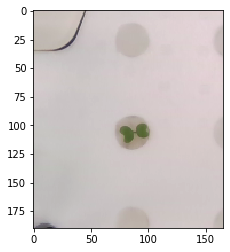

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import imageio
img = imageio.imread('Image_data/Coco_2017_unlabeled//rgbd_plant/rgb_00_000_00.png')
mask = imageio.imread('Image_data/Coco_2017_unlabeled/rgbd_new_label/label_00_000_000.png')
plt.imshow(img)

In [3]:
Segmentors.algorithmspace

{'FB': GAHelpers.Segmentors.Felzenszwalb,
 'SC': GAHelpers.Segmentors.Slic,
 'QS': GAHelpers.Segmentors.QuickShift,
 'WS': GAHelpers.Segmentors.Watershed,
 'CV': GAHelpers.Segmentors.Chan_Vese,
 'MCV': GAHelpers.Segmentors.Morphological_Chan_Vese,
 'AC': GAHelpers.Segmentors.MorphGeodesicActiveContour}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


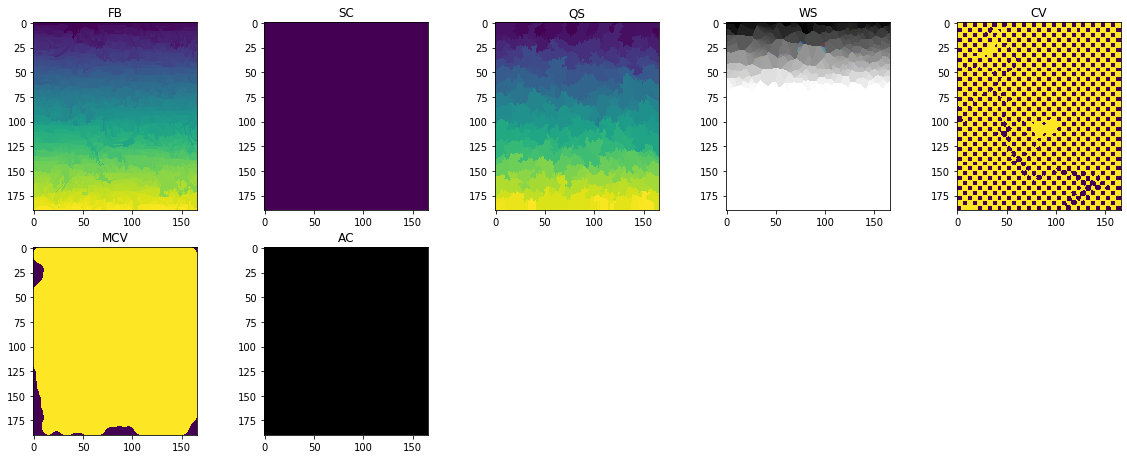

In [4]:
tot = len(Segmentors.algorithmspace)
fig = plt.figure(figsize=(20,20))
for index, segkey in enumerate(Segmentors.algorithmspace):
    ax = fig.add_subplot(5,5,index+1)
    seg = Segmentors.algorithmspace[segkey]()
    mask = seg.evaluate(img.copy())
    ax.imshow(mask)
    plt.title(segkey)

Test the parameter parser

In [5]:
params = ['FB', 515, 0.566, 984, 0.09, 92, 436, 10, 0.59, 4, 841, 134, 8, 0.01, 0.85, [2, 1], 0.0, 'checkerboard', 'circle', 1, 895, -49, 105, 121, 2]

Parsing Parameter List


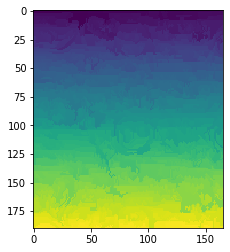

In [6]:
seg = Segmentors.algoFromParams(params)
mask = seg.evaluate(img)
plt.imshow(mask)

In [7]:
p = Segmentors.parameters()

In [8]:
p.printparam('scale')

'scale=0.0\n\tA parameter for felzenszwalb\n\t[i for i in range(0,10000)]\n'

In [9]:
print(p)

algorithm=None
	string code for the algorithm
	['FB','SC','WS','CV','MCV','AC']
beta=0.0
	A parameter for randomWalker So, I should take this out
	[i for i in range(0,10000)]
tolerance=0.0
	A parameter for flood and flood_fill
	[float(i)/1000 for i in range(0,1000,1)]
scale=0.0
	A parameter for felzenszwalb
	[i for i in range(0,10000)]
sigma=0.0
	sigma value. A parameter for felzenswalb, inverse_guassian_gradient, slic, and quickshift
	[float(i)/100 for i in range(0,10,1)]
min_size=0.0
	parameter for felzenszwalb
	[i for i in range(0,10000)]
n_segments=0.0
	A parameter for slic
	[i for i in range(2,10000)]
iterations=10
	A parameter for both morphological algorithms
	[10, 10]
ratio=0.0
	A parameter for ratio
	[float(i)/100 for i in range(0,100)]
kernel_size=0.0
	A parameter for kernel_size
	[i for i in range(0,10000)]
max_dist=0.0
	A parameter for quickshift
	[i for i in range(0,10000)]
seed=0.0
	A parameter for quickshift, and perhaps other random stuff
	[134]
connectivity=0.0
	A para